# Test: Distributed/Statistical Analysis/ANOVA

## Analysis of variance
Analysis of variance (ANOVA) is used to study the behavior of a quantitative variable to be explained in terms of one or more categorical nominal variables. In the ANOVA setting, the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether the population means of several groups are equal, and therefore generalizes the t-test to more than two groups.

## Preliminary analysis
- Outliers may have a considerable influence on statistical conclusion. They have to be consider carefully, and possibly left out. The identification of outliers may be performed by the median's test (Leys et al., 2013) for instance. 

- ANOVA relies on two crutial assumptions : the normality of the residuals and the homogeneity of variances. Before interpreting results, we should verify that these assumptions have been met. To assess the normality of the residuals, we can plot a QQplot or use the Kolmogorov-Smirnov's test. If the test fails, we should prefer the nonparametric Kruskal–Wallis test (Ostertagová, Ostertag & Kováč, 2014). To assess the homogeneity of variance, we can perform the Levenne's test. 

- Cautions: we should check that there is at least 10 measures by cell.    

## Parametrization
In case of unbalanced data, as it is the case in our data, there are three ways to o calculate the sums of squares for ANOVA, each relying on a specific hypothesis:

- *Type I, also called “sequential” sum of squares.* This tests the main effect of the first factor, followed by the main effect of the second factor, after the main effect of the first factor, followed by the interaction effect of the first two factors, after the main effects, and so on... For two factors A and B, we obtain (where SS is sum of squares):
    - $SS(A)$ for factor A
    - $SS(B~|~A)$ for factor B
    - $SS(AB~|~A, B)$ for interaction

This tests the main effect of factor A, **ignoring the factor B**. This approah leads to the Simpson paradox. 

**WARNING : Because of its sequential nature, type I ANOVA will give different results depending on which main effect is considered first.**

- *Type II, only main effects.* This type tests for each main effect **controlling for others factors**, no significant interaction being assumed. For two factors A and B, we calculate:
    - $SS(A~|~B)$ for factor A
    - $SS(B~|~A)$ for factor B
    
You should test for interaction first $SS(AB~|~A, B) and only if AB is not significant, continue with the analysis for main effects. If there is indeed no interaction, then **type II** is statistically more powerful than **type III.**

- *Type III*, tests main effect of factors, **controlling for other factors**. This type tests for the presence of a main effect after the other main effect and interaction.  This approach is therefore valid in the presence of significant interactions. For two factors A and B, we calculate:
    - $SS(A~|~B, AB)$ for factor A
    - $SS(B~|~A, AB)$ for factor B



## Implementation



Download study database from the subproject: sample-data-db-setup

In [1]:
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

data = pd.read_csv('Data/desd-synthdata.csv')
data.head()

,subjectcode,subjectage,subjectageyears,gender,_3rdventricle,_4thventricle,rightaccumbensarea,leftaccumbensarea,rightamygdala,leftamygdala,...,rs3851179_a,rs17125944_c,rs10498633_t,rs3764650_g,rs3865444_t,rs2718058_g,fdg,pib,av45,tiv
0,desd1,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,desd2,63.0,63.0,M,1.7427,1.8381,0.41218,0.46676,0.89412,0.95116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,desd3,67.0,67.0,M,2.0299,2.3463,0.37023,0.38063,0.86274,0.89655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,desd4,NaN,NaN,M,1.5226,3.2169,0.41779,0.46245,0.86853,0.89788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,desd5,71.0,71.0,M,1.9663,2.5945,0.31503,0.30522,0.68437,0.70803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Show the results of ANOVA in a workable format for publication.

In [2]:
dep_var = "righthippocampus"
indep_vars = "C(gender) * C(agegroup)"
formula = str.format("%s ~ %s" % (dep_var, indep_vars))
lm = sm.ols(data = data, formula = formula).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,19.602861,19.602861,154.622448,6.734873e-33
C(agegroup),4.0,5.942986,1.485746,11.719195,2.763876e-09
C(gender):C(agegroup),4.0,0.467794,0.116949,0.922461,4.501034e-01
Residual,910.0,115.368781,0.126779,NaN,NaN


### Code limitations
- It is not impossible to have more than 8 covariables.
- It would be better to ensure that there is at least 10 measures in each cells.


## Supplemntary test proposal
### Data visualization

The first proposal concerns the visualization of data. We can first display the distribution of each group. This is difficult when there is too many variables. 

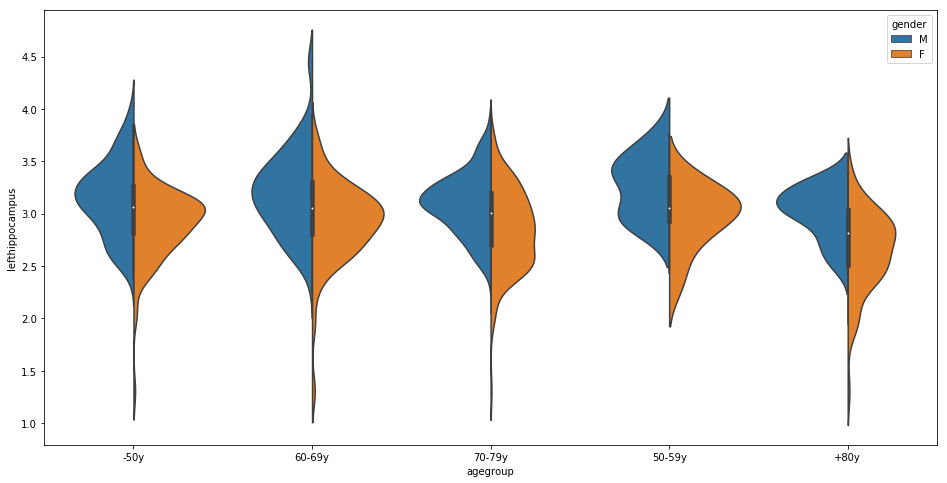

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
ax = sns.violinplot(x = "agegroup", y = "lefthippocampus", hue="gender", data = data, split=True)
#ax = sns.boxplot(x = "agegroup", y = "lefthippocampus", hue="gender", data = data)

We can also show the repartition of the sample in each group. To have a valid interpretation of the results of the ANOVA, the group must be balanced.

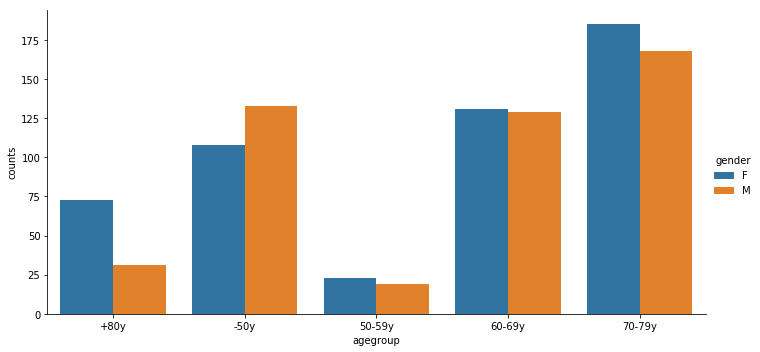

In [5]:
dataCount = data.groupby(['agegroup','gender']).size().reset_index(name='counts')
ax = sns.catplot(x = "agegroup", y ='counts', hue = "gender", data = dataCount, aspect = 2., kind = 'bar')

### Test of normality
First visualization of the quartile-quartile plot

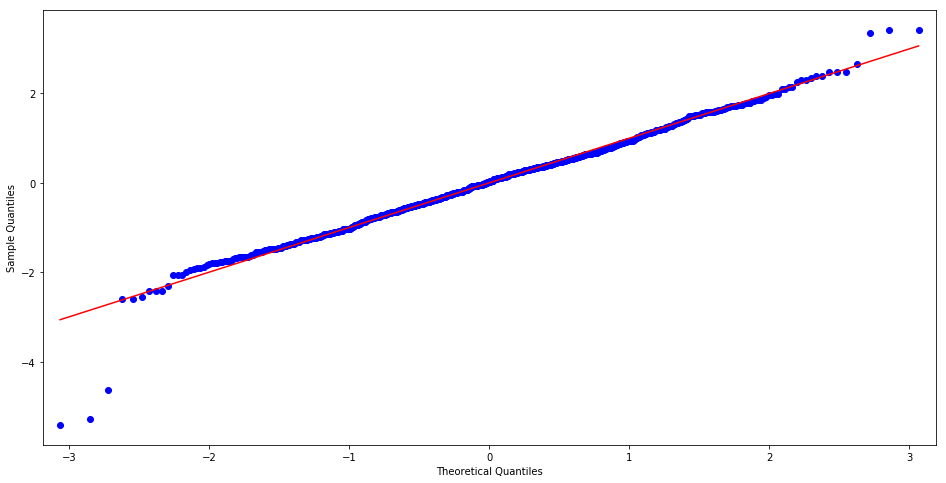

In [6]:
import statsmodels.api as sm
residu = lm.resid_pearson
sm.qqplot(residu, fit = True, line = 'r');

Now, we use the Shapiro-Wilk test (Shapiro & Wilk, 1965). The null hypothesis is that data are normally distributed.

In [25]:
from scipy import stats
resultShapiro = stats.shapiro(residu)
print('Statistic W = {}, and p_value = {}'.format(resultShapiro[0], resultShapiro[1]))

Statistic W = 0.9832820892333984, and p_value = 9.222330454861094e-09


### Test of variance homogeneity

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

In [39]:
import numpy as np
dataToEval = data.groupby(['agegroup','gender'], as_index=False)['lefthippocampus'].apply(np.hstack)
dataToEval['-50y','F']
dataF = dataToEval['-50y','F']
#resultLevene = stats.levene(dataToEval[['-50y','F'], dataToEval['-50y','M']])
#print('Statistic = {}, and p_value = {}'.format(resultLevene[0], resultLevene[1]))

array([   nan,    nan, 2.5777, 3.5674, 2.6663,    nan, 2.6776, 2.9787,
       3.0083, 2.8952, 2.9435, 2.3865,    nan, 3.0832, 3.0738, 3.2747,
       2.3976, 2.577 , 3.3746, 3.4302, 3.0577, 3.135 ,    nan, 3.1069,
       2.8124,    nan, 3.1706, 2.9131, 3.2871, 2.9132, 3.0569, 2.6776,
       2.7905, 3.0452, 2.7706, 3.1929, 2.4995, 3.5729, 1.3047, 3.0505,
       2.8601, 3.2196, 3.0423, 3.0054, 2.7243, 2.0602, 2.5595, 3.0937,
       2.822 , 3.3601, 2.7936, 2.783 , 3.0792, 3.0526, 2.4588, 2.3964,
       2.8438, 3.0802, 2.7243, 3.0832, 3.0738, 3.0562, 2.0491, 2.7014,
       3.0418, 3.0832, 2.886 , 2.7707, 3.2736,    nan, 3.0874, 3.1564,
       3.0832, 3.0114, 2.5693, 2.9098, 3.0792,    nan, 3.0832, 3.0149,
          nan, 3.1767, 3.1564, 2.4588,    nan, 2.8019, 2.8595, 2.654 ,
       3.1069, 3.1275, 3.1564, 3.5866, 2.9947, 3.1302, 2.9947,    nan,
       2.8613, 2.4995, 2.8482, 2.7632, 2.4742, 2.7273, 3.0646, 2.7187,
       2.822 , 3.2571, 2.454 , 2.8231])